In [4]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
# Carpeta con imágenes procesadas
ruta_procesadas = './images/procesadas/'

# Usando SIFT

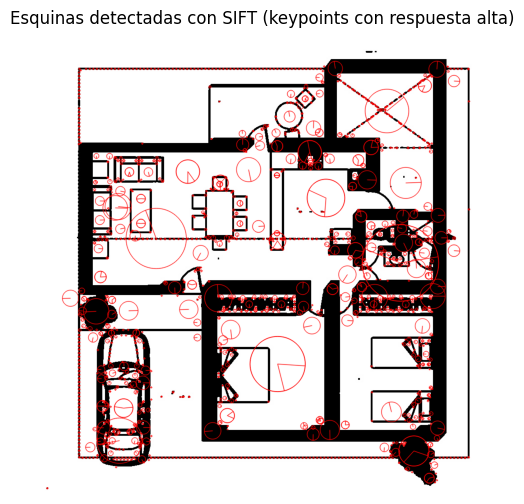

Cantidad de esquinas detectadas (con respuesta > 0.025): 1817


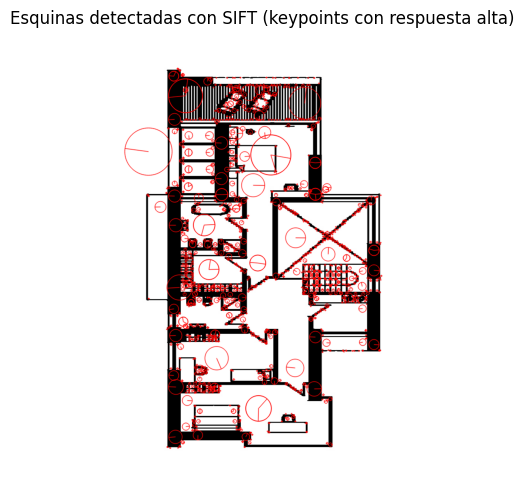

Cantidad de esquinas detectadas (con respuesta > 0.025): 1777


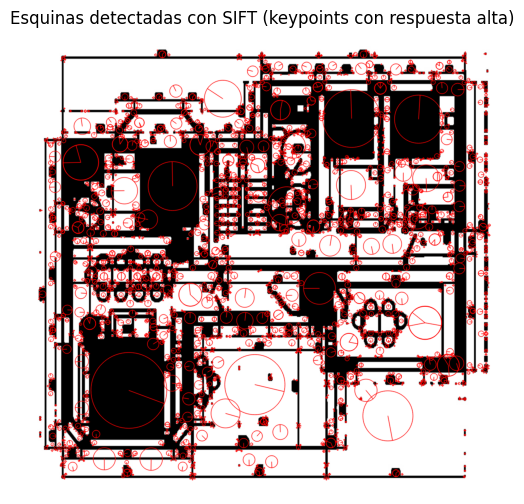

Cantidad de esquinas detectadas (con respuesta > 0.025): 4365


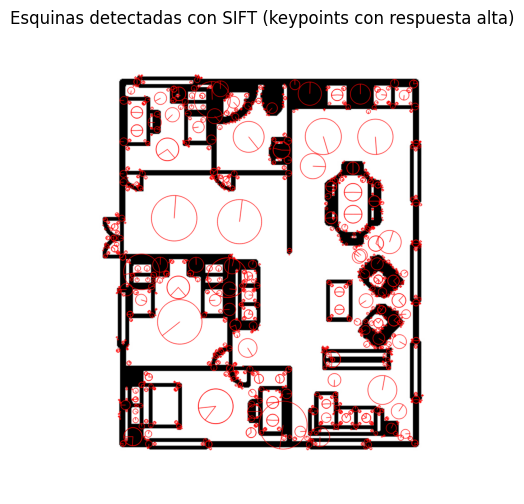

Cantidad de esquinas detectadas (con respuesta > 0.025): 1542


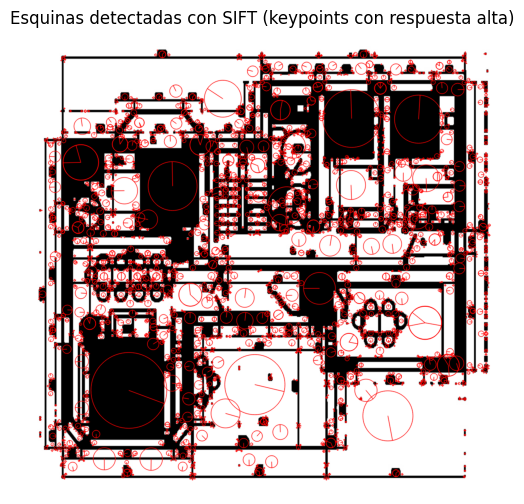

Cantidad de esquinas detectadas (con respuesta > 0.025): 4365


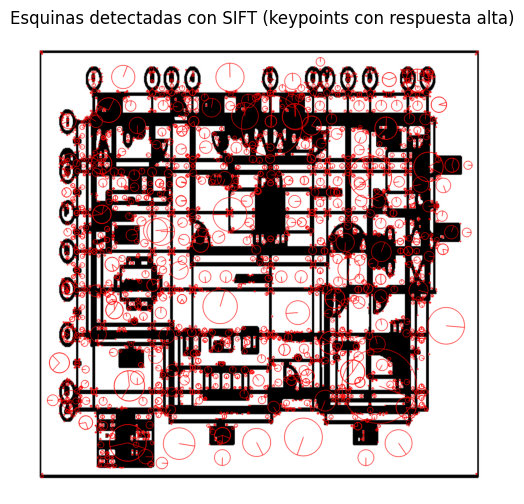

Cantidad de esquinas detectadas (con respuesta > 0.025): 4061


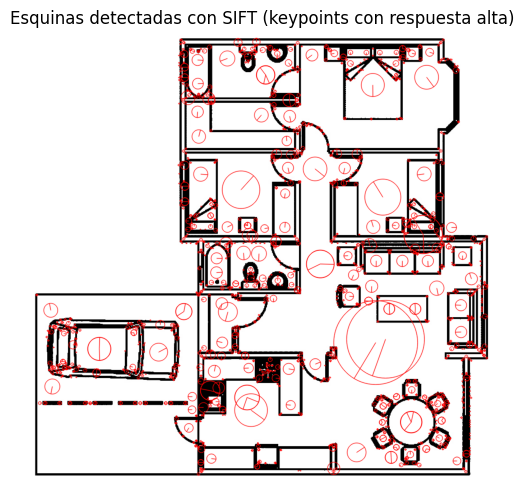

Cantidad de esquinas detectadas (con respuesta > 0.025): 1785


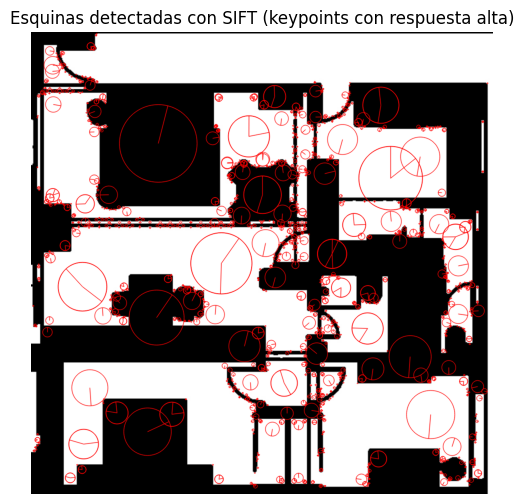

Cantidad de esquinas detectadas (con respuesta > 0.025): 1450


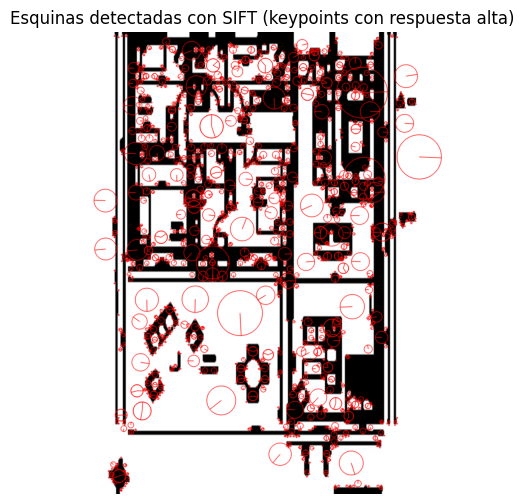

Cantidad de esquinas detectadas (con respuesta > 0.025): 2151


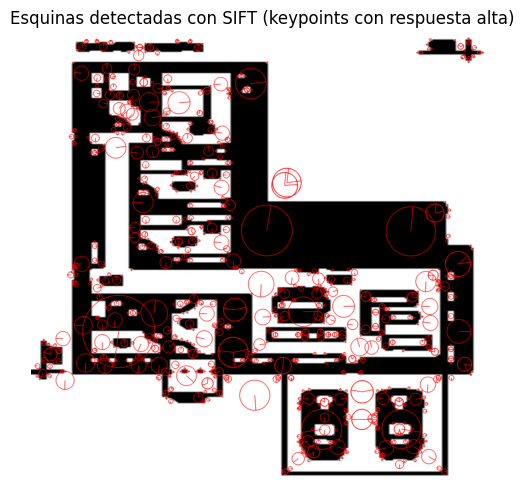

Cantidad de esquinas detectadas (con respuesta > 0.025): 964


In [29]:
threshold_response = 0.025  # Puedes ajustar este valor

for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializa el detector SIFT
    sift = cv2.SIFT_create()

    # Detecta puntos clave y calcula descriptores
    keypoints, descriptors = sift.detectAndCompute(image, None)

    # Filtra puntos clave que tienen alta respuesta (probablemente son esquinas fuertes)
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibuja SOLO los puntos clave considerados esquinas
    image_with_corners = cv2.drawKeypoints(image, corner_keypoints, None, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Muestra la imagen con las esquinas detectadas
    plt.figure(figsize=(8,6))
    plt.imshow(image_with_corners)
    plt.title("Esquinas detectadas con SIFT (keypoints con respuesta alta)")
    plt.axis('off')
    plt.show()

    print(f"Cantidad de esquinas detectadas (con respuesta > {threshold_response}): {len(corner_keypoints)}")

# Usando KAZE

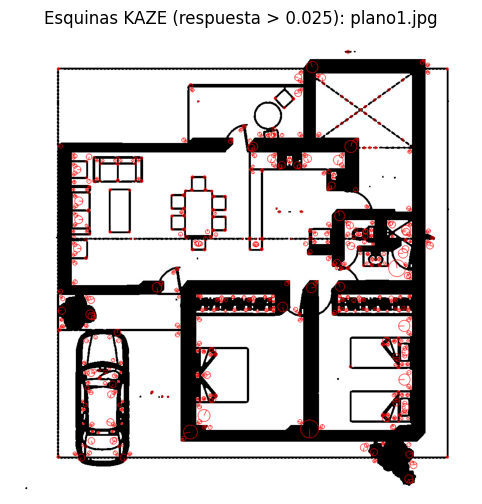


Imagen: plano1.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 770


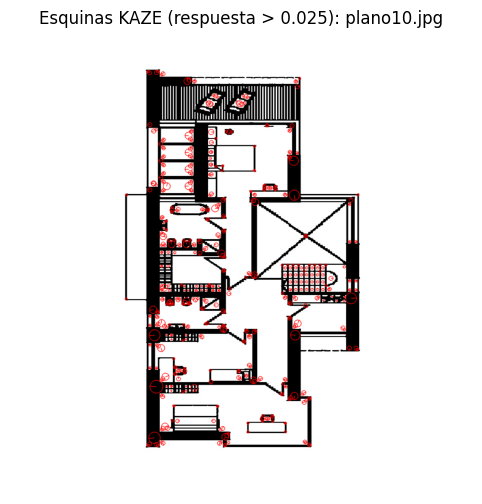


Imagen: plano10.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 496


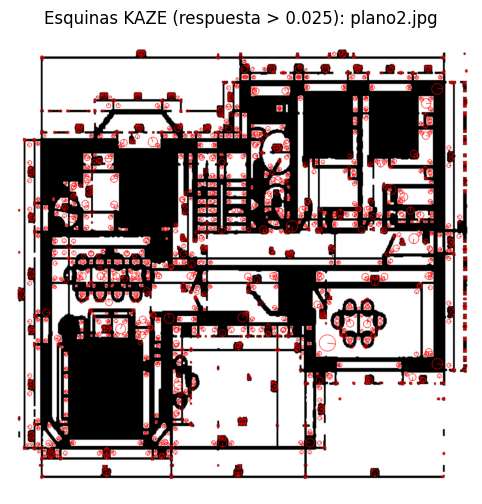


Imagen: plano2.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 1782


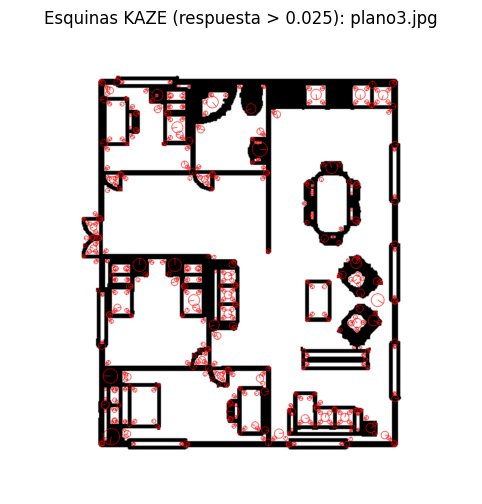


Imagen: plano3.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 664


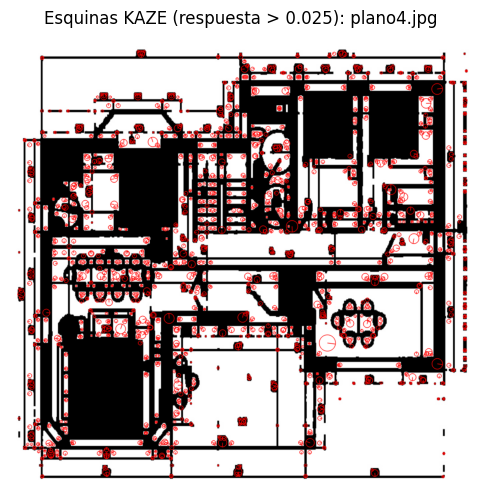


Imagen: plano4.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 1782


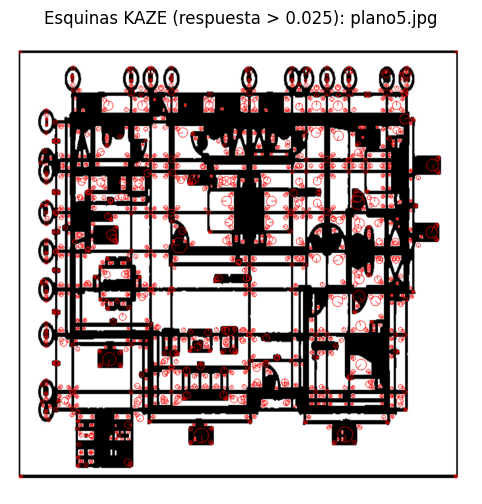


Imagen: plano5.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 1675


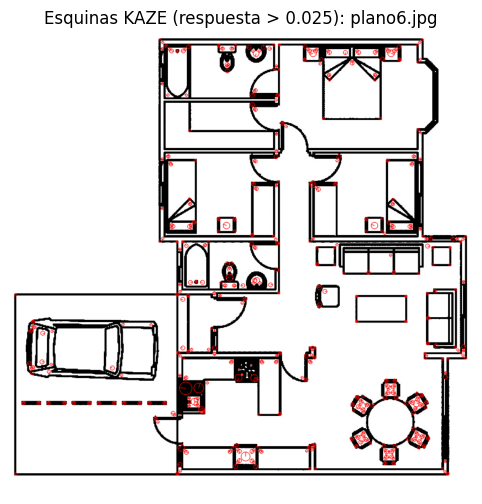


Imagen: plano6.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 555


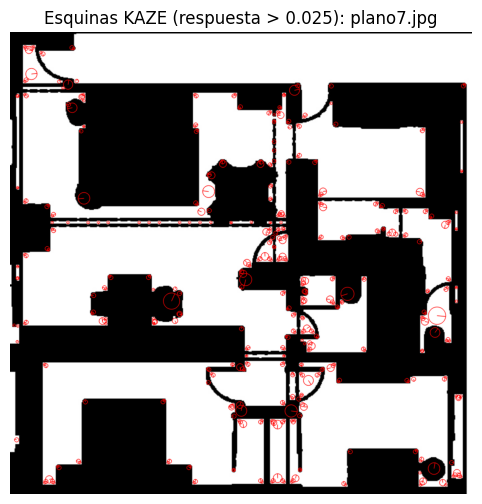


Imagen: plano7.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 448


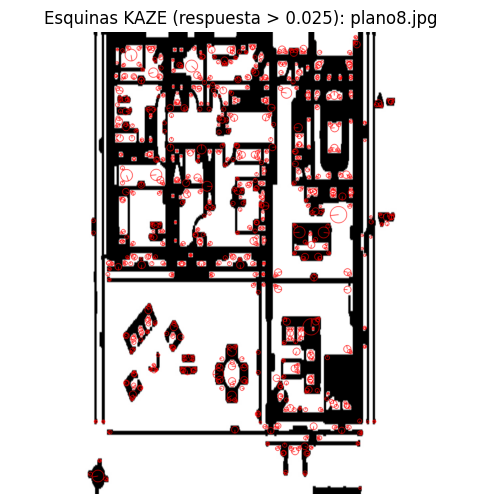


Imagen: plano8.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 970


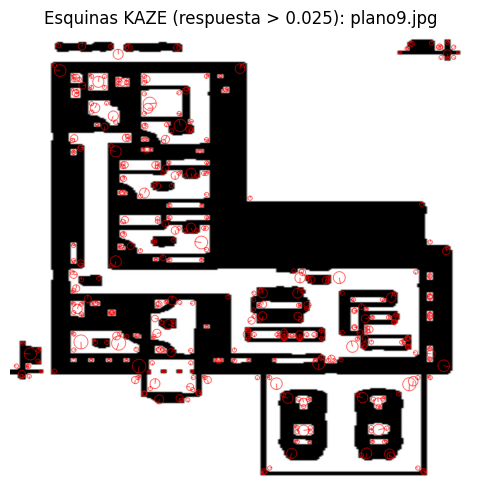


Imagen: plano9.jpg
Cantidad de esquinas detectadas KAZE (respuesta > 0.025): 527


In [28]:
threshold_response = 0.025  # Ajusta según lo que observes

for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    img = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Crear detector AKAZE
    akaze = cv2.KAZE_create()
    keypoints, descriptors = akaze.detectAndCompute(img, None)

    # Filtrar puntos clave con respuesta alta (esquinas fuertes)
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibujar solo las esquinas detectadas
    img_corners = cv2.drawKeypoints(
        img, corner_keypoints, None, color=(255, 0, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Mostrar imagen con esquinas fuertes
    plt.figure(figsize=(8, 6))
    plt.imshow(img_corners)
    plt.title(f"Esquinas KAZE (respuesta > {threshold_response}): {nombre}")
    plt.axis('off')
    plt.show()

    print(f"\nImagen: {nombre}")
    print(f"Cantidad de esquinas detectadas KAZE (respuesta > {threshold_response}): {len(corner_keypoints)}")

# Usando ORB

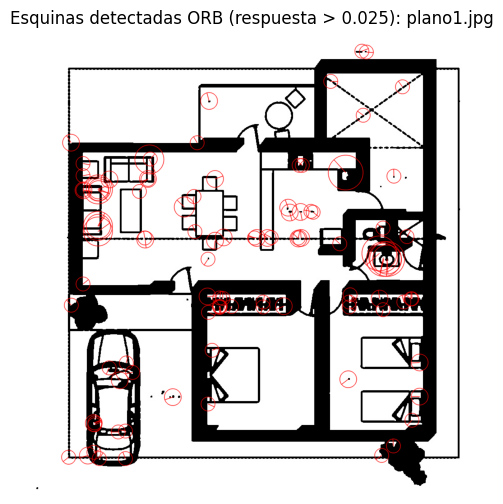

Cantidad de esquinas detectadas en plano1.jpg (respuesta > 0.025): 102


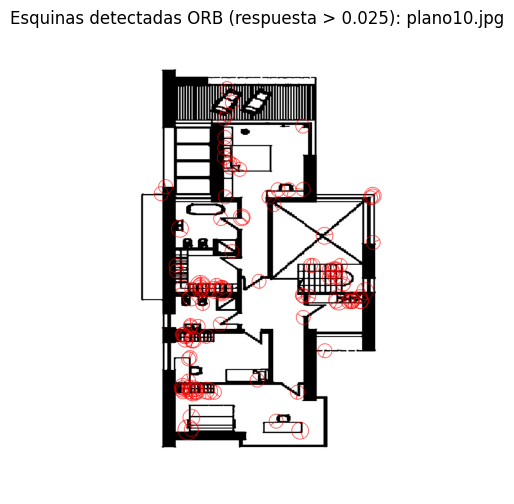

Cantidad de esquinas detectadas en plano10.jpg (respuesta > 0.025): 115


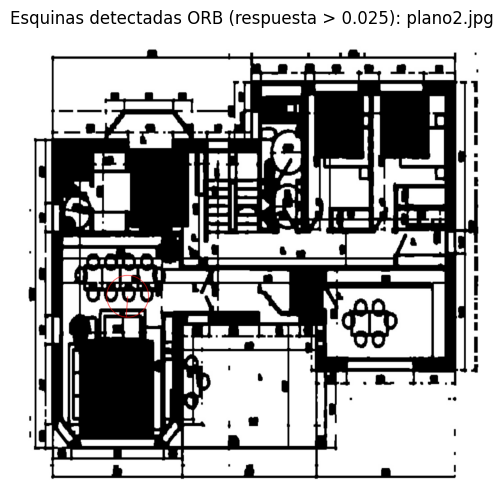

Cantidad de esquinas detectadas en plano2.jpg (respuesta > 0.025): 1


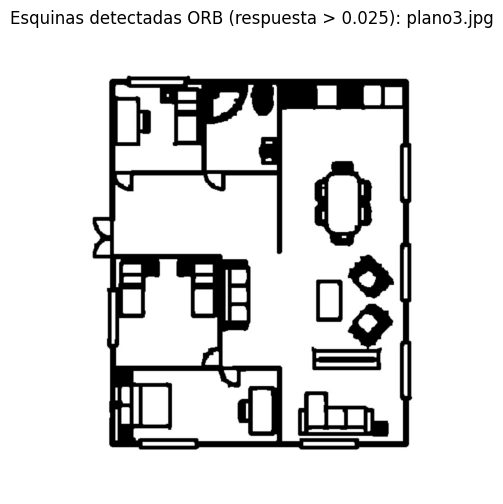

Cantidad de esquinas detectadas en plano3.jpg (respuesta > 0.025): 0


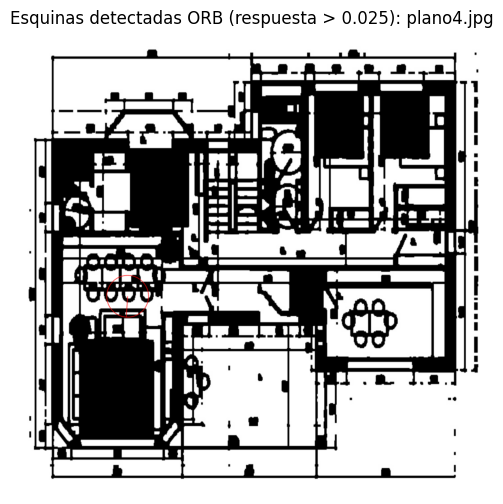

Cantidad de esquinas detectadas en plano4.jpg (respuesta > 0.025): 1


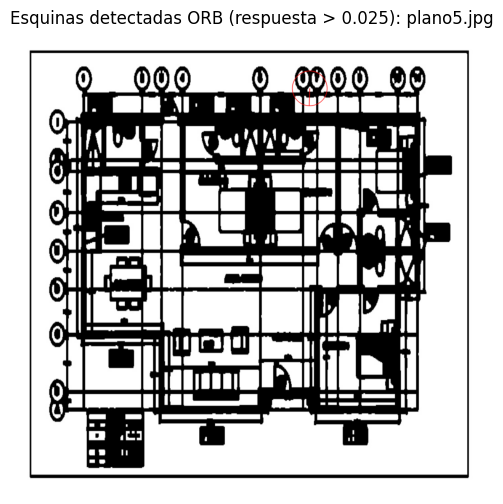

Cantidad de esquinas detectadas en plano5.jpg (respuesta > 0.025): 1


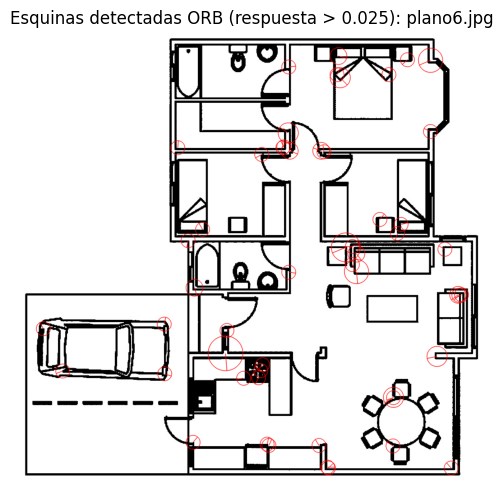

Cantidad de esquinas detectadas en plano6.jpg (respuesta > 0.025): 53


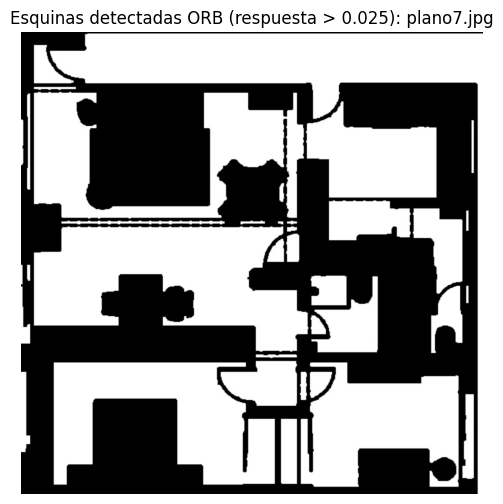

Cantidad de esquinas detectadas en plano7.jpg (respuesta > 0.025): 0


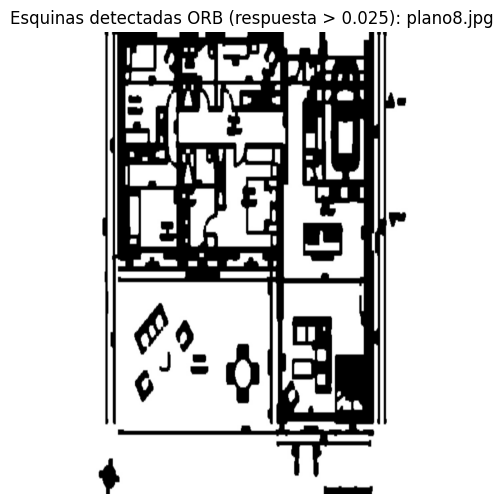

Cantidad de esquinas detectadas en plano8.jpg (respuesta > 0.025): 0


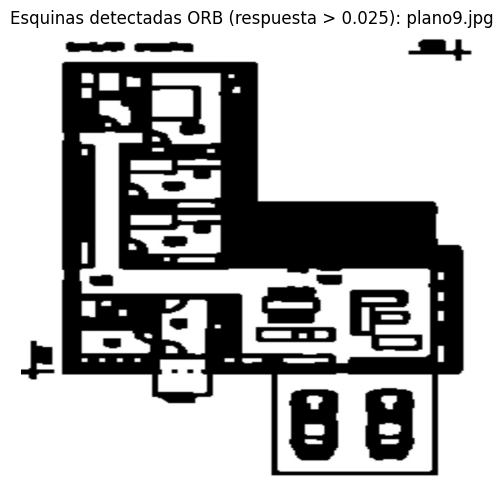

Cantidad de esquinas detectadas en plano9.jpg (respuesta > 0.025): 0


In [20]:
threshold_response = 0.025 # Puedes ajustar este valor según los resultados (prueba con 0.03 - 0.15)

for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Inicializa ORB
    orb = cv2.ORB_create()

    # Detecta puntos clave y descriptores
    keypoints, descriptors = orb.detectAndCompute(image, None)

    # Filtra puntos clave con respuesta alta (esquinas fuertes)
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibuja solo esos puntos considerados "esquinas"
    image_with_corners = cv2.drawKeypoints(
        image, corner_keypoints, None, color=(255, 0, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Muestra la imagen con las esquinas detectadas
    plt.figure(figsize=(8,6))
    plt.imshow(image_with_corners)
    plt.title(f"Esquinas detectadas ORB (respuesta > {threshold_response}): {nombre}")
    plt.axis('off')
    plt.show()

    print(f"Cantidad de esquinas detectadas en {nombre} (respuesta > {threshold_response}): {len(corner_keypoints)}")

# Usando FREAK

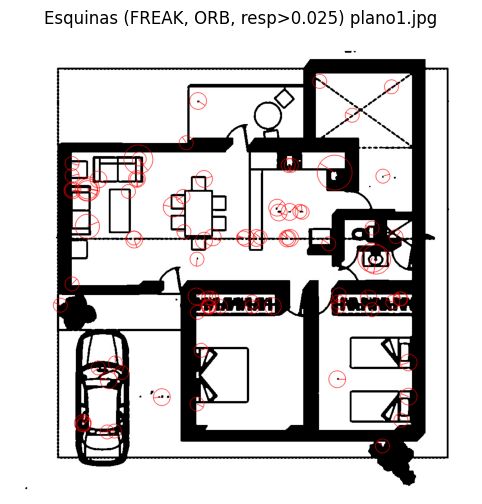


Imagen: plano1.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 87


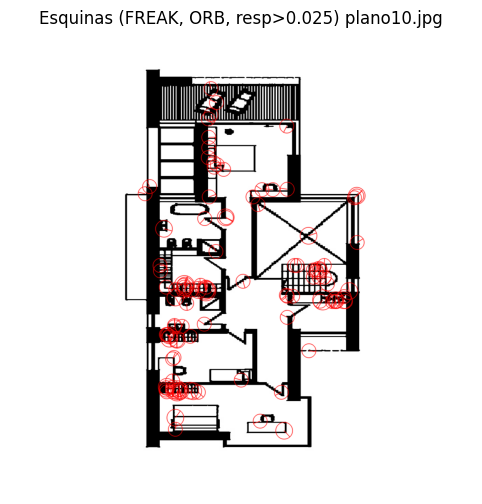


Imagen: plano10.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 114


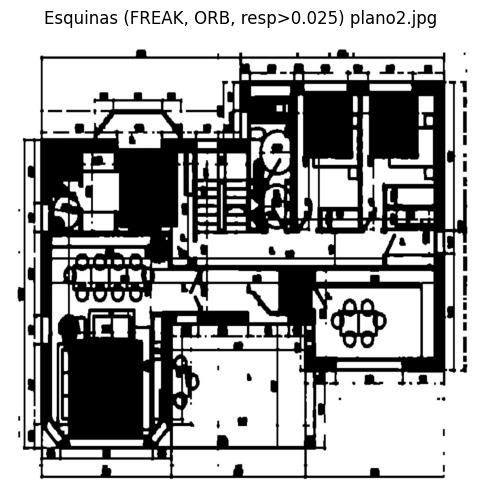


Imagen: plano2.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


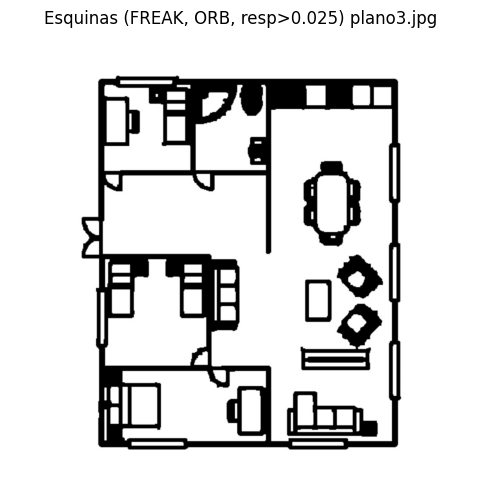


Imagen: plano3.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


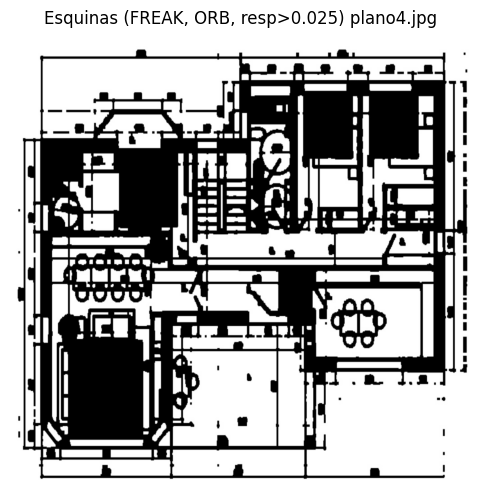


Imagen: plano4.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


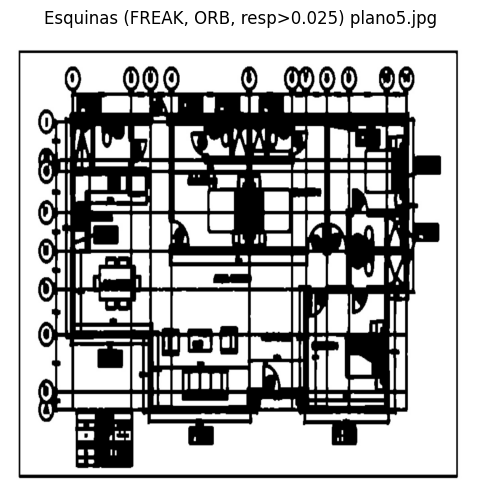


Imagen: plano5.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


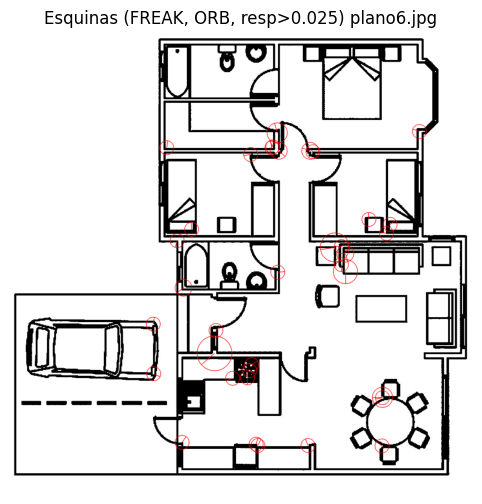


Imagen: plano6.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 36


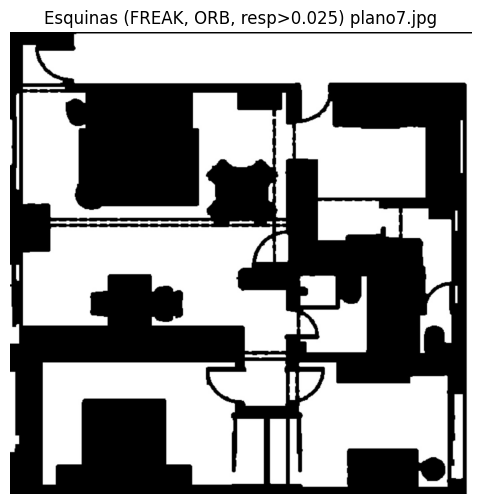


Imagen: plano7.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


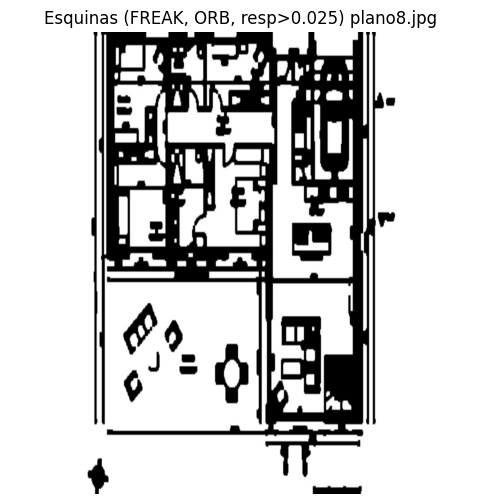


Imagen: plano8.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


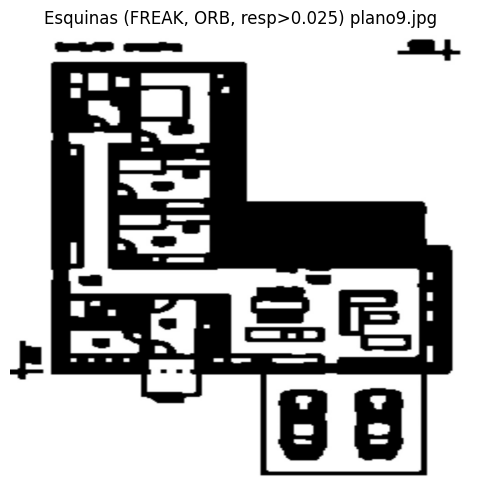


Imagen: plano9.jpg
Cantidad de esquinas FREAK+ORB (respuesta > 0.025): 0


In [21]:
threshold_response = 0.025  # Ajusta el umbral según tus necesidades

# Verifica que FREAK esté disponible
if not hasattr(cv2, 'xfeatures2d'):
    raise ImportError("FREAK solo funciona con 'opencv-contrib-python'. Instala con: pip install opencv-contrib-python")

for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    image = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Paso 1: Detectar puntos clave con ORB
    orb = cv2.ORB_create()
    keypoints = orb.detect(image, None)

    # Paso 2: Extraer descriptores FREAK
    freak = cv2.xfeatures2d.FREAK_create()
    keypoints, descriptors = freak.compute(image, keypoints)

    # Filtra los puntos clave con respuesta alta (esquinas fuertes)
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibuja solo los puntos clave considerados esquinas
    image_with_corners = cv2.drawKeypoints(
        image, corner_keypoints, None, (255, 0, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Muestra la imagen con las esquinas detectadas
    plt.figure(figsize=(8,6))
    plt.imshow(image_with_corners)
    plt.title(f"Esquinas (FREAK, ORB, resp>{threshold_response}) {nombre}")
    plt.axis('off')
    plt.show()

    print(f"\nImagen: {nombre}")
    print(f"Cantidad de esquinas FREAK+ORB (respuesta > {threshold_response}): {len(corner_keypoints)}")

# Usando AKAZE

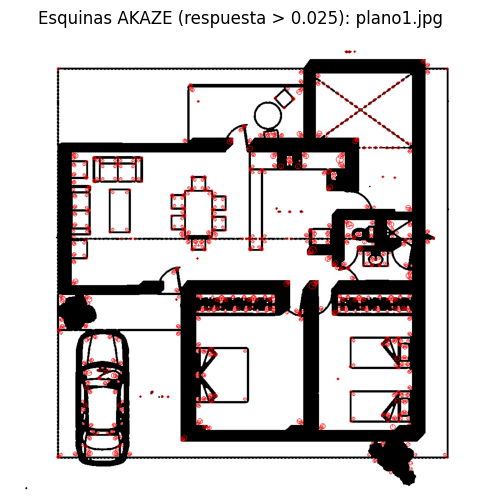


Imagen: plano1.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 880


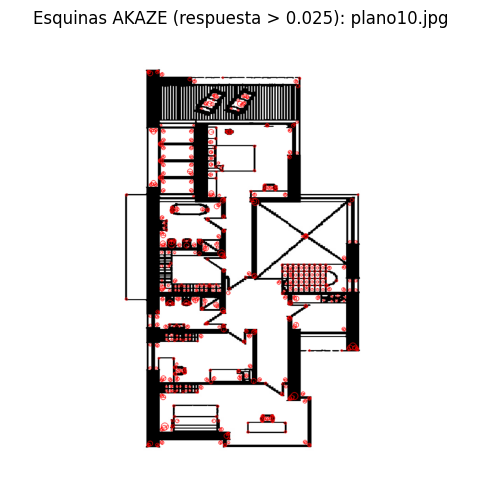


Imagen: plano10.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 636


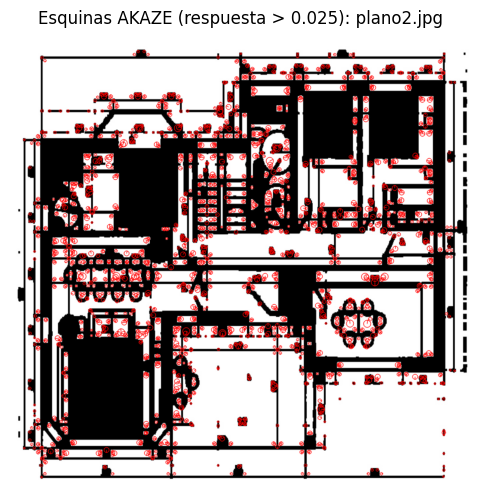


Imagen: plano2.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 2105


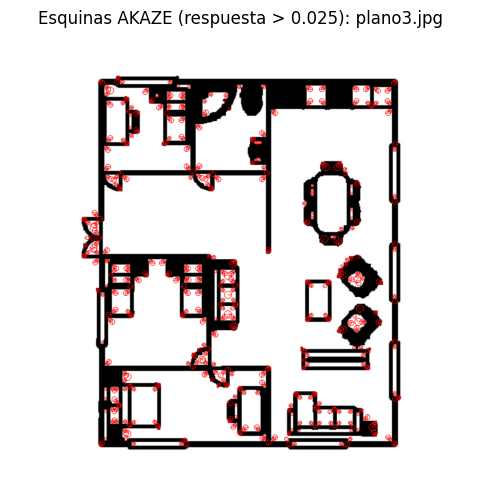


Imagen: plano3.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 780


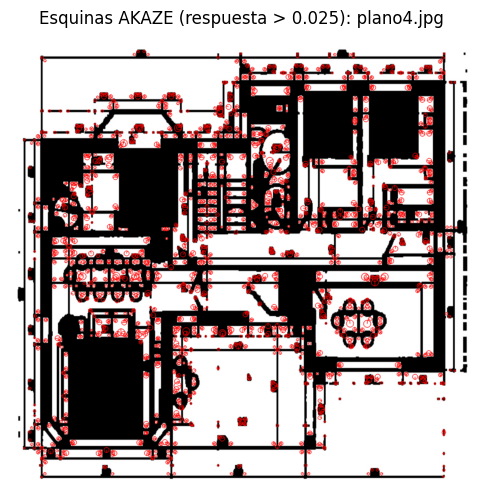


Imagen: plano4.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 2105


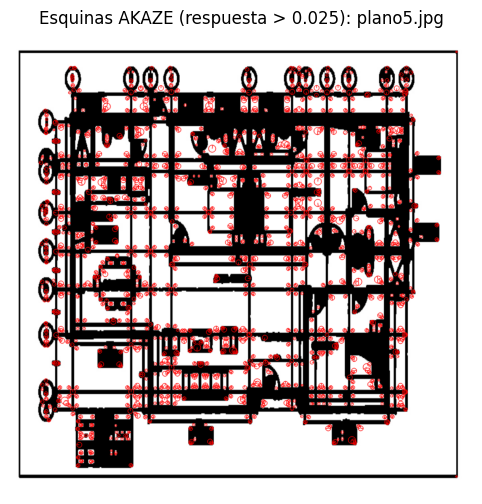


Imagen: plano5.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 2101


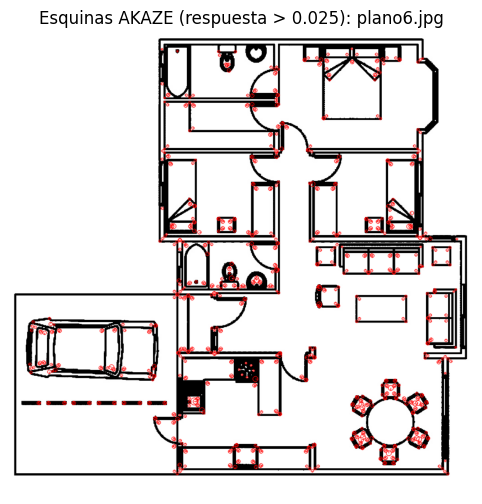


Imagen: plano6.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 793


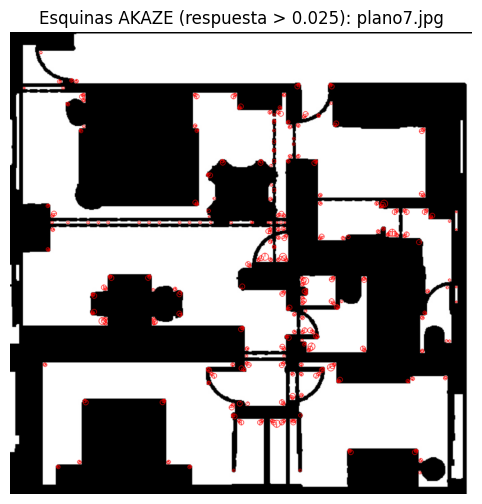


Imagen: plano7.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 441


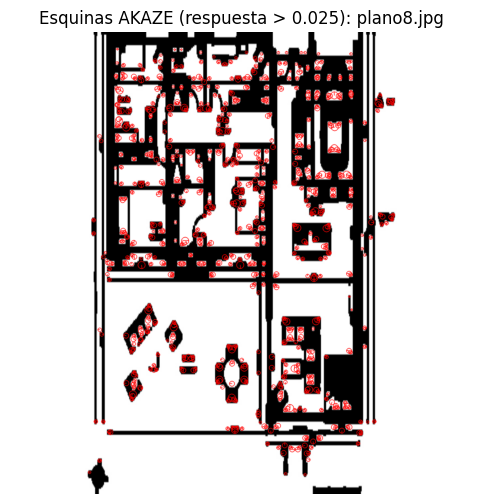


Imagen: plano8.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 1192


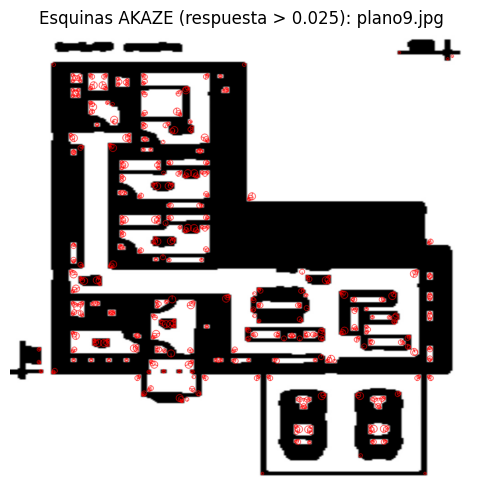


Imagen: plano9.jpg
Cantidad de esquinas detectadas AKAZE (respuesta > 0.025): 679


In [26]:
threshold_response = 0.025  # Ajusta según lo que observes

for nombre in sorted(os.listdir(ruta_procesadas)):
    if not nombre.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.webp')):
        continue

    ruta_img = os.path.join(ruta_procesadas, nombre)
    img = cv2.imread(ruta_img, cv2.IMREAD_GRAYSCALE)

    # Crear detector AKAZE
    akaze = cv2.AKAZE_create()
    keypoints, descriptors = akaze.detectAndCompute(img, None)

    # Filtrar puntos clave con respuesta alta (esquinas fuertes)
    corner_keypoints = [kp for kp in keypoints if kp.response > threshold_response]

    # Dibujar solo las esquinas detectadas
    img_corners = cv2.drawKeypoints(
        img, corner_keypoints, None, color=(255, 0, 0),
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Mostrar imagen con esquinas fuertes
    plt.figure(figsize=(8, 6))
    plt.imshow(img_corners)
    plt.title(f"Esquinas AKAZE (respuesta > {threshold_response}): {nombre}")
    plt.axis('off')
    plt.show()

    print(f"\nImagen: {nombre}")
    print(f"Cantidad de esquinas detectadas AKAZE (respuesta > {threshold_response}): {len(corner_keypoints)}")

        imagen  keypoints_KAZE  keypoints_ORB  keypoints_SIFT  \
0   plano1.jpg            4762            500            1735   
1  plano10.jpg            3176            500            1779   
2   plano2.jpg            7557            500            4366   
3   plano3.jpg            2298            500            1542   
4   plano4.jpg            7557            500            4366   
5   plano5.jpg            7250            500            4061   
6   plano6.jpg            4345            500            1791   
7   plano7.jpg            2397            500            1450   
8   plano8.jpg            3874            500            2152   
9   plano9.jpg            2399            500             964   

   keypoints_FREAK  keypoints_AKAZE  
0              353             3686  
1              436             2724  
2              351             5726  
3              352             2046  
4              351             5726  
5              325             5874  
6              285

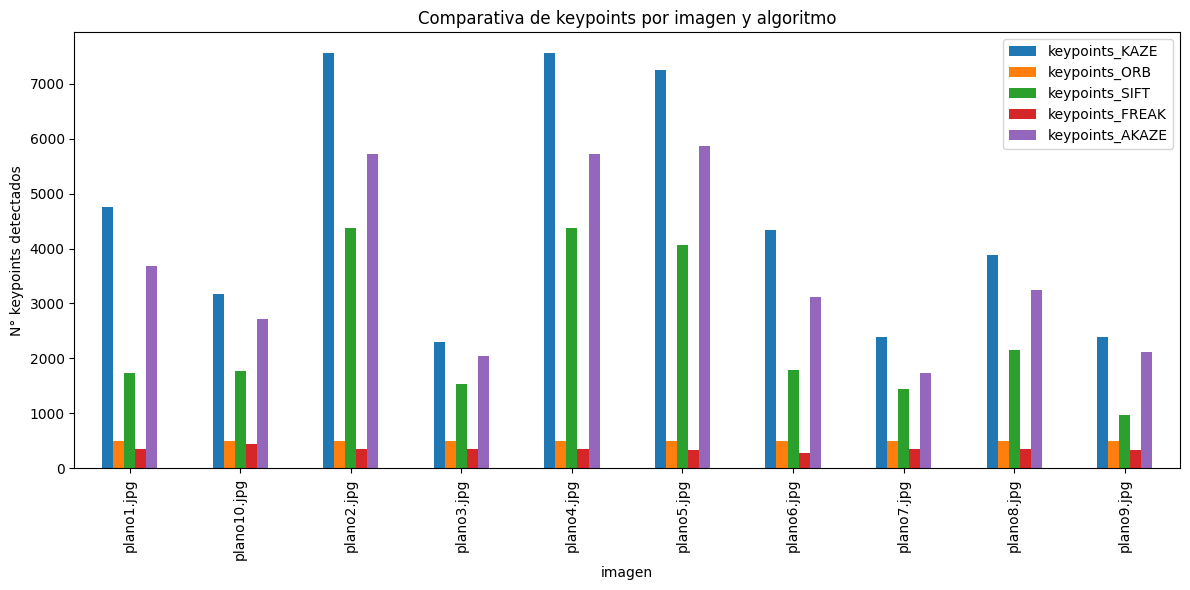

In [23]:
import pandas as pd

excel_path = "estadisticas.xlsx"

algoritmos = ["KAZE", "ORB", "SIFT", "FREAK", "AKAZE"]

# Lee cada hoja y extrae [imagen, num_keypoints]
resultados = []
for algo in algoritmos:
    df = pd.read_excel(excel_path, sheet_name=algo, engine="openpyxl")
    resultados.append(df[["imagen", "num_keypoints"]].rename(columns={"num_keypoints": f"keypoints_{algo}"}))

# Une todo por 'imagen'
df_final = resultados[0]
for df_algo in resultados[1:]:
    df_final = pd.merge(df_final, df_algo, on="imagen", how="outer")

# Ordena por nombre de imagen
df_final = df_final.sort_values("imagen").reset_index(drop=True)

print(df_final)

# Si quieres guardar el comparativo en una hoja nueva:
with pd.ExcelWriter(excel_path, mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_final.to_excel(writer, sheet_name="Comparativa_keypoints", index=False)

print("Comparativa de keypoints guardada en 'Comparativa_keypoints'.")

# Opcional: para visualizar rápidamente en plot
import matplotlib.pyplot as plt

df_final.plot(x="imagen", kind="bar", figsize=(12,6))
plt.ylabel("N° keypoints detectados")
plt.title("Comparativa de keypoints por imagen y algoritmo")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

excel_path = "estadisticas.xlsx"
algoritmos = ["KAZE", "ORB", "SIFT", "FREAK", "AKAZE"]

df = pd.read_excel(excel_path, sheet_name="Comparativa_keypoints", engine="openpyxl")

# Calcula promedios y máximos
resumen = {}
for algo in algoritmos:
    columna = f"keypoints_{algo}"
    resumen[algo] = {
        "promedio": df[columna].mean(),
        "maximo": df[columna].max(),
        "minimo": df[columna].min()
    }

# Presenta el resumen
print("Resumen comparativo de keypoints:")
for algo in algoritmos:
    info = resumen[algo]
    print(f"{algo}: promedio={info['promedio']:.2f}, max={info['maximo']}, min={info['minimo']}")

# Visualización como tabla
summary_df = pd.DataFrame(resumen).T
print("\nTabla resumen:")
print(summary_df)


Resumen comparativo de keypoints:
KAZE: promedio=4561.50, max=7557, min=2298
ORB: promedio=500.00, max=500, min=500
SIFT: promedio=2420.60, max=4366, min=964
FREAK: promedio=349.70, max=436, min=285
AKAZE: promedio=3600.80, max=5874, min=1739

Tabla resumen:
       promedio  maximo  minimo
KAZE     4561.5  7557.0  2298.0
ORB       500.0   500.0   500.0
SIFT     2420.6  4366.0   964.0
FREAK     349.7   436.0   285.0
AKAZE    3600.8  5874.0  1739.0
